In [1]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
clean = pd.read_csv("data/machinelearning.csv", index_col = 0)

/Users/kpainton/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
X = clean.drop('MinorityDriver', axis = 1)
Y = clean['MinorityDriver']

seed = 7
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [4]:
rus = RandomUnderSampler(random_state=42, sampling_strategy = (2/3))
X_train_under40, y_train_under40 = rus.fit_sample(X_train, y_train)

In [ ]:
param_test2 = {
 'max_depth':[3,5,6,7,8],
 'min_child_weight':[4,5,6],
 'n_estimators':[100,150,200,300],
 'reg_alpha':[1e-5, 1e-2, 0.1,1],
 'learning_rate': [0.1,0.2,0.3],
 'subsample': [0.8, 0.9, 0.95],
 'gamma': [0.1,0.2,1,2]
}
gsearch2 = GridSearchCV(estimator = XGBClassifier(objective= 'binary:logistic'), 
 param_grid = param_test2, scoring='roc_auc', n_jobs = -1, iid=False, cv=3)
gsearch2.fit(X_train, y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

In [6]:
xgbs = XGBClassifier(n_estimators=150,
                      max_depth = 8,
                      subsample = 0.95,
                      colsample_bytree = 0.55,
                      min_child_weight = 4,
                      eta = 0.2,
                      alpha = 0.01,
                      gamma = 2, 
                     objective= 'binary:logistic', n_jobs =  -1,
                     eval_metric = 'auc')
model = xgbs.fit(X_train_under40, y_train_under40)
rf_predictions = model.predict(X_test)
rf_probs = model.predict_proba(X_test)[:, 1]
roc_value = roc_auc_score(y_test, rf_probs)
print(roc_value)
print(confusion_matrix(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))

0.7074643847688383
[[998803 233025]
 [189308 149936]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83   1231828
           1       0.39      0.44      0.42    339244

    accuracy                           0.73   1571072
   macro avg       0.62      0.63      0.62   1571072
weighted avg       0.74      0.73      0.74   1571072



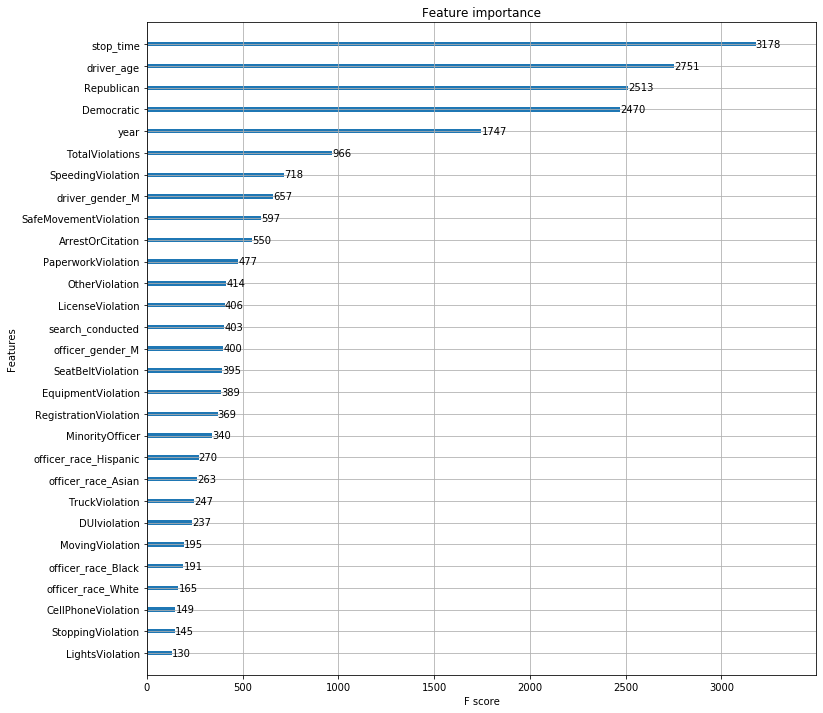

In [9]:
import matplotlib.pyplot as plt
import xgboost as xgb
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [20, 20]
plt.savefig('importance.png', bbox_inches = 'tight')